# CONCACTENATION OF MULTIPLE IMAGES USING OPENCV PYTHON:

We know some times the window showed by opencv is not fit to the screen of computer, and we know it is also annoying to watch many images at a time.

Concactenation means grouping otherc into a single entity.In opencv we concatenation for grouping several images.
By concatenation we can show several images in single window.By doing this it is easier to see all the images together.

In [7]:
import cv2

img1 = cv2.imread('images/avengers.jpg')
img2 = cv2.imread('images/buildings.jpg')
img3 = cv2.imread('images/blue_ball.jpg')
img4 = cv2.imread('images/black_ball.jpg')
img5 = cv2.imread('images/balls.jpg')
img6 = cv2.imread('images/car.jpg')

'''
cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.imshow('img3',img3)
cv2.imshow('img4',img4)
cv2.imshow('img5',img5)

cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\ncv2.imshow('img1',img1)\ncv2.imshow('img2',img2)\ncv2.imshow('img3',img3)\ncv2.imshow('img4',img4)\ncv2.imshow('img5',img5)\n\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

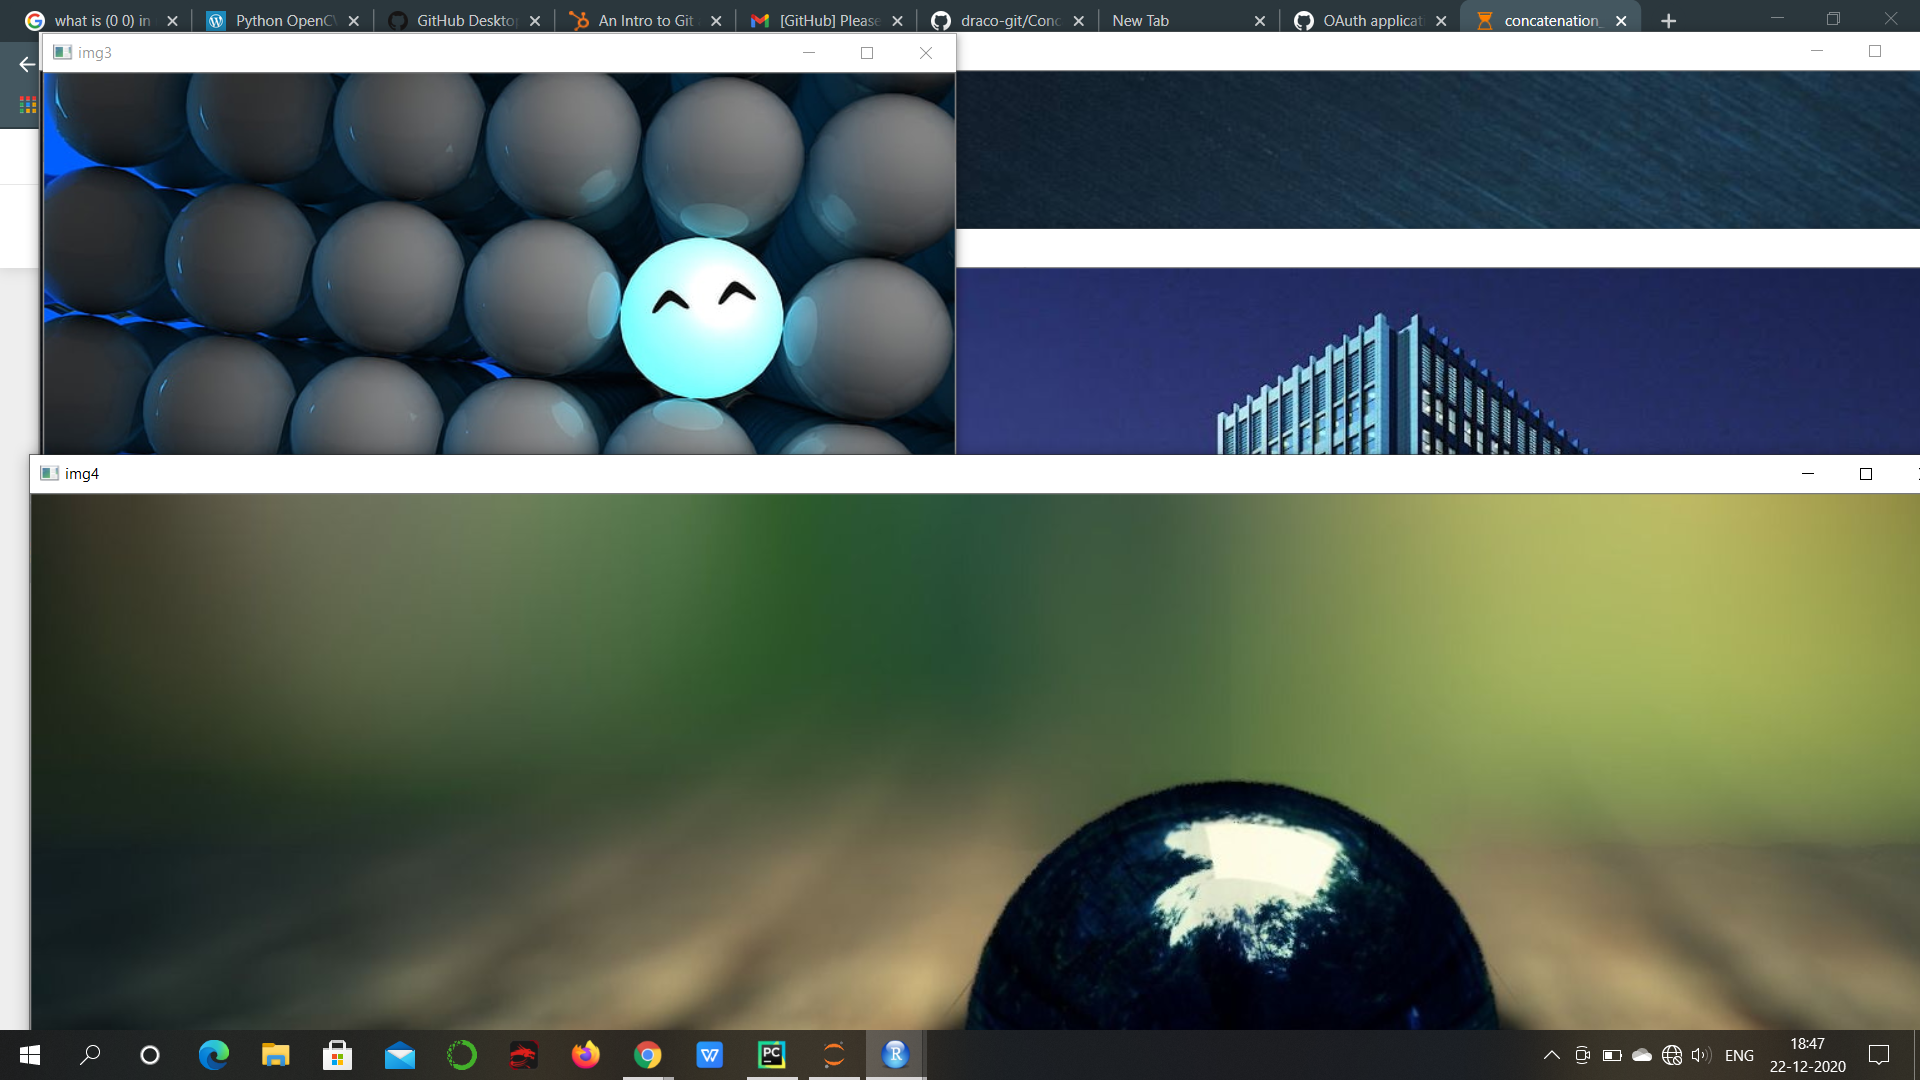

from abouve figure we can clearly see the images which are very large unable to see in the screen. As we cannot also judge the number of images on the screen.

So to overcome this difficulty we use stacking of images, which can be possible in two ways one in opencv and another in numpy.
Presently i will explain in opencv.

The functions used for stacking is done by two methods in opencv package. They are 

1.cv2.hconcat()

2.cv2.vconcat()

NOTE : The images which are to be concated must be of same dimensions.


1.hconcat() :- Horizontal Concat
    syntax : cv2.hconcat(src:Any , dst:Any)
    where as src is the source of images i.e. the array of images which will be stacked and dst is the destination where the 
    output will be stored.
    Lets see the procedure:
    
    1. create an array of images which are to be stacked.
    
    2. Another main condition for stacking is that the dimensions of images in the array must be of same size.
    
    3. send the image array as parameter to hconcat() function and store the output in a variable.
    
    4. use cv2.imshow() function to visualize the output.

In [8]:
# as we also read the images in the first block.

#image_array consists of images
image_array = [img1,img2,img3,img4,img5,img6]

#we know all images must be of same dimensions.
orizinal_dim  = []
resized_image_array = []

orizinal_dim = [i.shape for i in image_array]
print('orizinal dimensions',orizinal_dim)

resized_image_array = [cv2.resize(i,(256,100)) for i in image_array]
print('resized dimensions',[i.shape for i in resized_image_array])

orizinal dimensions [(1080, 1920, 3), (1000, 1600, 3), (410, 728, 3), (1080, 1920, 3), (1200, 1920, 3), (1080, 1920, 3)]
resized dimensions [(100, 256, 3), (100, 256, 3), (100, 256, 3), (100, 256, 3), (100, 256, 3), (100, 256, 3)]


here we can see the dimensions of all the images is same , so we can now use hconcat() function.

In [ ]:
hstacked_img  = cv2.hconcat(resized_image_array)
cv2.imshow('hstacked',hstacked_img)
cv2.waitKey(0)
cv2.destroyAllImages()

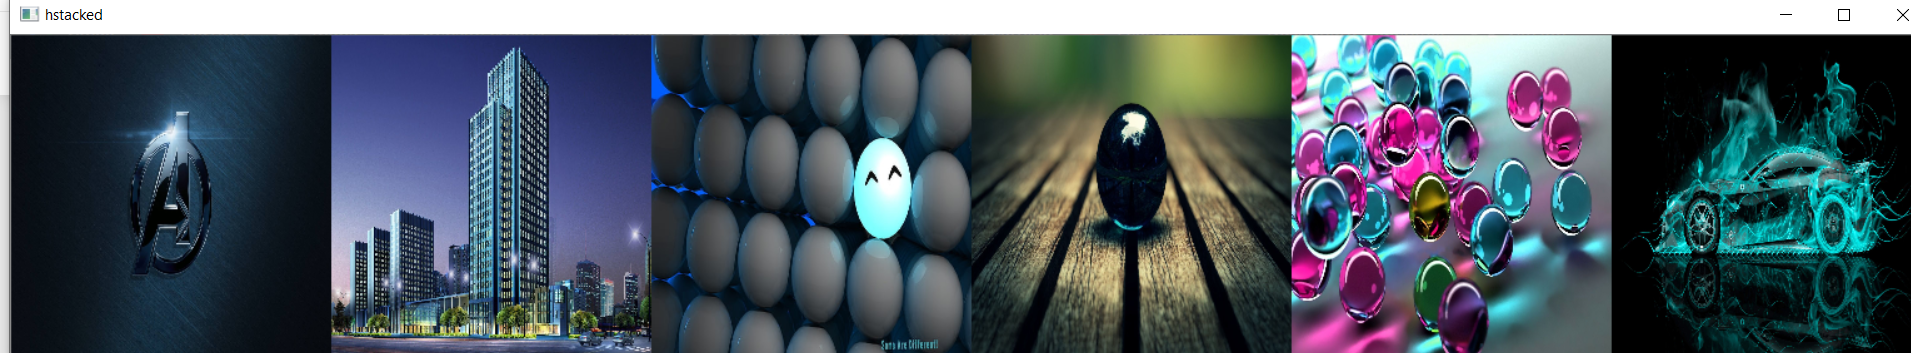

From the above figure we can see the images are horizontally stacked. And all of the same size i.e. (256,256,3)

2.vconcat() :- vertically concat

    Second method to concat the images is vconcat() method in opencv . It is similar to hconcat() method but the images are 
    vertically concated , and of same dimensions.
    Lets see the vertically concat.

In [4]:
# we already created image array for hconcat so we can use same array here.

vstacked_img = cv2.vconcat(resized_image_array)
cv2.imshow('vstacked',vstacked_img)
cv2.waitKey(1)
cv2.imwrite('project_images/vstacked.jpg',vstacked_img)

True

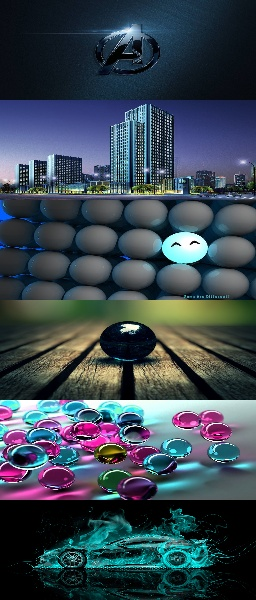

From the above figure we can see that all images are vertically stacked.
But the vertical stacked is very long in case of more number of images , so to overcome this challange we had to concact images in both vertical and horizontal ways.

Let get it done now.

Concactenation by both horizontal and vertical :-

    1.To this i had created a function named stacked images which consist of parameters [image_matrix, scale].
    image_matrix is twodimensional array consists of images that are to be stacked. And image_matrix is very important
    because it decides the order of images in the result.

In [9]:
# image_matrix consits of two rows and three columns which are the images.
image_matrix = [[img1,img2,img3],
               [img4,img5,img6]]

Now creation of stacked function:

    Which consists of two parameters 
    
    1.image_matrix  = matrix of imaegs as mentioned before.
    
    2.Scale it is used to resize the images of same dimensions which can be acheived by cv2.resize() function.Lets see the 
    cv2.resize function.

In [4]:
# lets use img3 in this function

cv2.imshow('orizinal image',img3)
scaled_image  = cv2.resize(img3,(0,0),fx=0.5,fy=0.5) # the img dimensions is halfed which is mentioned in fx and fy
cv2.imshow('scaled image',scaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

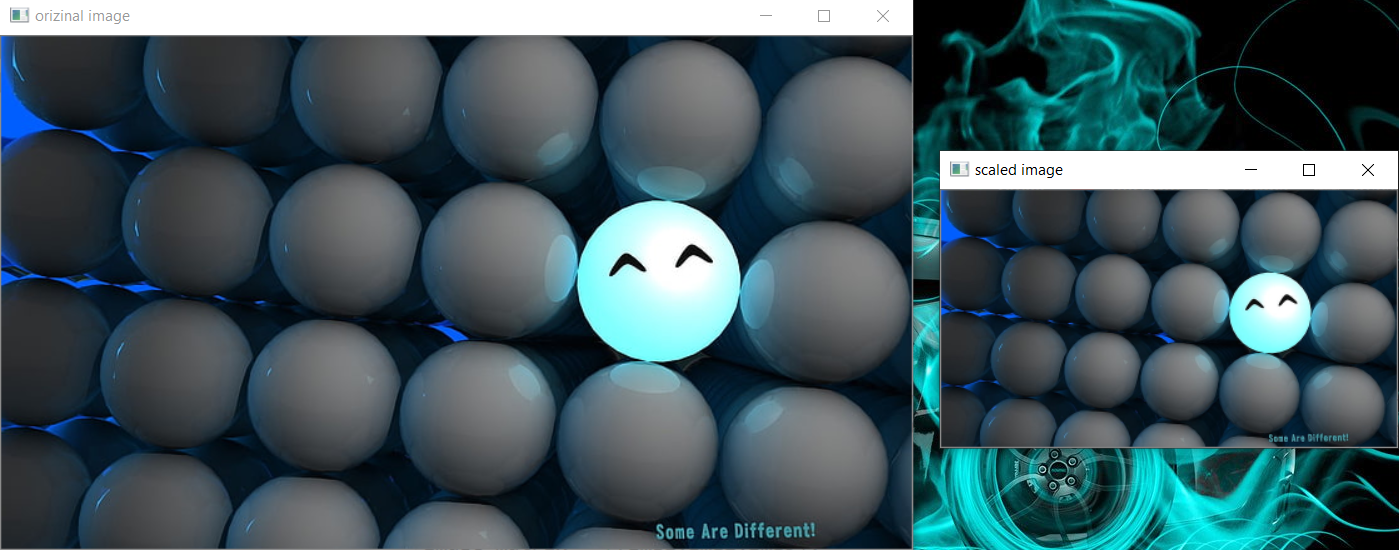

From the above figure we can see the two images .

In [5]:
print('orinizinal dimensions',img3.shape)
print('scaled dimensions',scaled_image.shape)

orinizinal dimensions (410, 728, 3)
scaled dimensions (205, 364, 3)


above we see the dimensions of scaled image which is half of orizinal dimensions . Here 3 is the no of channels which is fixed if we resize the image.

Now lets get to the main point , concactenation in both horizontal and vertical.
Lets define the stacked function and see the concat image.

In [36]:
def stacked(image_matrix,scale):
    
    sized_image_matrix = [] # 1 Used to store same_sized_images i.e. storing images having same dimensions.
    resized_im = []  # used to store images of same-sized_images after using scaling them.
    
    for i in image_matrix:
        sized_image_matrix.append([cv2.resize(j,(512,512)) for j in i]) 
        
    print('dimensions of sized_image_matrix images')
    print([[j.shape for j in i] for i in sized_image_matrix])
        
    for j in sized_image_matrix:
        resized_im.append([cv2.resize(k,None,(0,0),scale,scale) for k in j]) # 2
        
    print('dimensions of resized_im images')
    print([[j.shape for j in i] for i in resized_im])
            
    stacked_matrix  = cv2.vconcat([cv2.hconcat(list_h) for list_h in resized_im]) # 3
    
    cv2.imshow('stacked_image',stacked_matrix) # 4
    cv2.waitKey(0)
    #cv2.imwrite('project_images\stacked_matrix.jpg',stacked_matrix)
    cv2.destroyAllWindows()

In [37]:
stacked(image_matrix,0.5)

dimensions of sized_image_matrix images
[[(512, 512, 3), (512, 512, 3), (512, 512, 3)], [(512, 512, 3), (512, 512, 3), (512, 512, 3)]]
dimensions of resized_im images
[[(256, 256, 3), (256, 256, 3), (256, 256, 3)], [(256, 256, 3), (256, 256, 3), (256, 256, 3)]]


the above is the defintion of stacked function.At each line it mentioned with specific number as comment.Those indicate

1.First creating a empty array to store the resized_image_matrix and same_sized_images. Because it is necessary that all images 
must be have same dimensions . So first i had make all the images of same dimensions , then we can use scale to change the dimensions of whole stacked image.

2.Then the resized image matrix created.

3.Then the concactenation is done using hconcat and vconcat.

4.Shows the ouptut.

The below is the stacked_image . The order of images is in the same order of images in image_matrix.

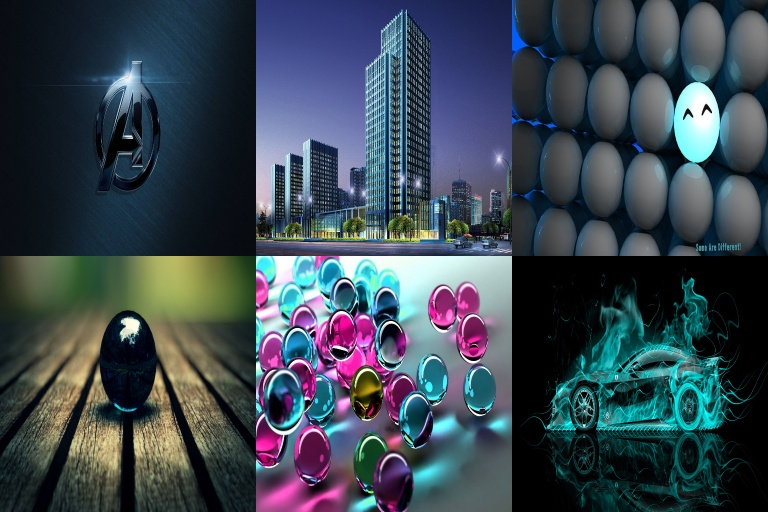

So this is the end of today.Signing off madhav.!!

IF ANY QUESRIES COMMENT IT , I WILL TRY TO CLARIFY THOSE .